In [1]:
import utils as u 

2024-05-03 10:57:37.347440: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file_paths = [
    "data/data1.json", # Hand pose labels
    "data/data2.json", # Hand poses to be distinguished from the triggering hand poses.
    "data/data3.json", # Hand poses to be distinguished from the triggering hand poses.
    ]

x_train, y_train, x_test, y_test = u.load_data(file_paths, random_seed=2) 

[2 1 4 ... 2 4 0]


In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(4736, 63) (4736,) (1185, 63) (1185,)


In [4]:
x_train, y_train, x_val, y_val, x_test, y_test = u.preprocess_data(x_train, 
                                                                 y_train, 
                                                                 x_test, 
                                                                 y_test)

In [5]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(4263, 63) (4263,) (1185, 63) (1185,)


In [6]:
print(len(x_train.shape))
print(x_train.max())
print(x_train.min())

print(len(x_test.shape))
print(x_test.max())
print(x_test.min())

2
1.0007992
-0.21653211
2
0.9958083
-0.17719933


In [7]:
model = u.build_model()


In [8]:
history = u.train_model(model, x_train, y_train, x_val, y_val, 
                      epochs=30, batch_size=64)

Epoch 1/30
67/67 [==============================] - 1s 6ms/step - loss: 1.5235 - accuracy: 0.2573 - val_loss: 1.4546 - val_accuracy: 0.3763
Epoch 2/30
67/67 [==============================] - 0s 3ms/step - loss: 1.3604 - accuracy: 0.4837 - val_loss: 1.2971 - val_accuracy: 0.5011
Epoch 3/30
67/67 [==============================] - 0s 2ms/step - loss: 1.1949 - accuracy: 0.6573 - val_loss: 1.1347 - val_accuracy: 0.7696
Epoch 4/30
67/67 [==============================] - 0s 2ms/step - loss: 1.0332 - accuracy: 0.7786 - val_loss: 0.9791 - val_accuracy: 0.8076
Epoch 5/30
67/67 [==============================] - 0s 2ms/step - loss: 0.8938 - accuracy: 0.8196 - val_loss: 0.8550 - val_accuracy: 0.8203
Epoch 6/30
67/67 [==============================] - 0s 3ms/step - loss: 0.7776 - accuracy: 0.8517 - val_loss: 0.7495 - val_accuracy: 0.8520
Epoch 7/30
67/67 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.8792 - val_loss: 0.6540 - val_accuracy: 0.8647
Epoch 8/30
67/67 [==

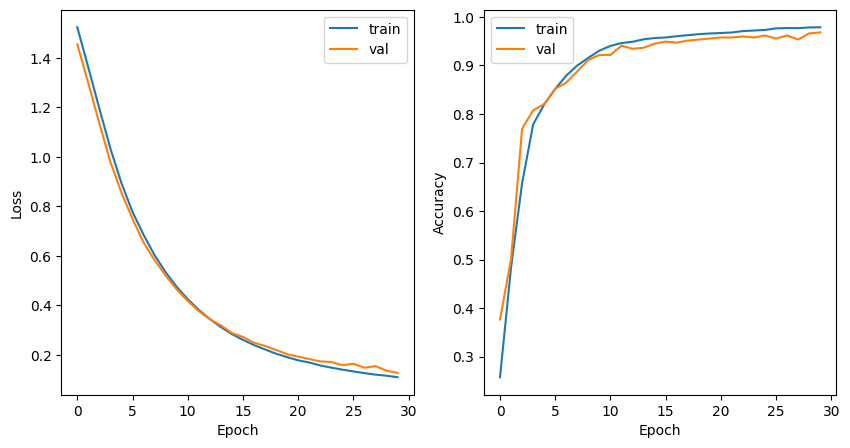

In [9]:
u.plot_loss(history)

In [10]:
test_acc, y_pred = u.test_model(model, x_test, y_test)
print(y_pred)

38/38 [==============================] - 0s 2ms/step
[[2.90638790e-03 4.22929786e-03 2.54111495e-02 1.52073172e-03
  9.65932429e-01]
 [9.41911697e-01 2.50957091e-04 1.06249508e-02 4.60143127e-02
  1.19805685e-03]
 [6.08451255e-02 2.54853349e-02 9.05901968e-01 5.11599123e-04
  7.25593558e-03]
 ...
 [7.04461560e-02 1.24455495e-02 9.08522189e-01 5.85624250e-04
  8.00045580e-03]
 [1.17764119e-02 4.10961471e-02 2.84972601e-02 5.06450073e-04
  9.18123662e-01]
 [8.58509421e-01 1.66646426e-03 3.48507240e-02 9.33088139e-02
  1.16646141e-02]]
38/38 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9789
[4 0 2 ... 2 4 0]


In [11]:
model.save('./Handpose-Recognition.keras')

In [12]:
print(test_acc)

0.9789029359817505


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2048      
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 2213 (8.64 KB)
Trainable params: 2213 (8.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
!tensorflowjs_converter \
    --input_format=keras \
    --output_format=tfjs_graph_model \
    --saved_model_tags=serve \
    /Users/qianruzhang/Documents/GitHub/Machine-Learning-TFJS/Week5-Real-Time-Handpose-Recognition/ML/Handpose-Recognition.keras \
    /Users/qianruzhang/Documents/GitHub/Machine-Learning-TFJS/Week5-Real-Time-Posture-Recognition/tfjsmodel
